<h2> Method_2 </h2> 
<h3> This notebook is presented by Pratibha Awasthi (015215655). Our data set consists of features like quantity, length of URL, parameters, and more, mainly numerical or categorical. During the analysis, it was observed that the considerable data set consists of '-1' as a value which the data authors have not described. 
This approach believes eventhough significance of '-1' is not described but it does hold some meaning. Also removal of such big data may distort the actual accuracy. Hence it consists -1" </h3>

<h2> Data load and manipulation </h2>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('dataset_full.csv')

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
list(df.columns)

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [5]:
df['qty_dot_url'].value_counts()

2     53649
1     15885
3     13205
4      3593
5      1008
6       454
7       217
14      135
8       120
15       86
9        64
10       48
16       44
13       37
12       33
11       32
17       22
18        6
20        3
22        3
19        1
23        1
24        1
Name: qty_dot_url, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


<H3> The data below is checked for NA values. If found these values would be eliminated. However, it is found that there have been no such null values. <h3/>

In [7]:
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

<h3> The unique value in data is checked and printed below. <h3/> 

In [8]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

qty_dot_url has 23 unique values
qty_hyphen_url has 30 unique values
qty_underline_url has 22 unique values
qty_slash_url has 25 unique values
qty_questionmark_url contains:			[0 1 2 3 9 7]
qty_equal_url has 20 unique values
qty_at_url has 15 unique values
qty_and_url has 21 unique values
qty_exclamation_url contains:			[ 0  1  8  2  5  3  4  9  6 10]
qty_space_url contains:			[0 1 4 9 3 2 7 6]
qty_tilde_url contains:			[0 1 5 3 4 2]
qty_comma_url contains:			[ 0  1  4  3  2  5 11  7]
qty_plus_url contains:			[ 0  2  1  5  4  3  6  9 19  7]
qty_asterisk_url has 18 unique values
qty_hashtag_url contains:			[ 0  2  9  3  1 13  7]
qty_dollar_url contains:			[ 0  1  6  3  9  8  2 10  5  4]
qty_percent_url has 52 unique values
qty_tld_url contains:			[ 1  3  2  0  4  5 12  7  9]
length_url has 453 unique values
qty_dot_domain has 19 unique values
qty_hyphen_domain has 12 unique values
qty_underline_domain contains:			[0 1 2 3]
qty_slash_domain contains:			[0]
qty_questionmark_domain contain

<h2>Exploratory Data Analysis</h2>

<h3> The data is analyzed to find the value counts for '0' and '1' A webiste is considered legitimate (value 0) or phishing (value 1). It was found that there are 58000 for 0s and 30647 for 1s. </h3>

In [9]:
df['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

<h3> Using countplot the 0s and 1s are plotted for better visuals </h3>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phishing', ylabel='count'>

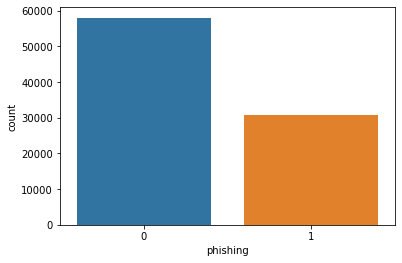

In [10]:
sns.countplot(df['phishing'])

<h3> Correlation: A heat map (or heatmap) is a graphical representation of data with color-coded values. Heat maps make it simple to display and comprehend complicated data at a glance. We have plotted heatmap to find correlation between different features. <h3/>

<AxesSubplot:>

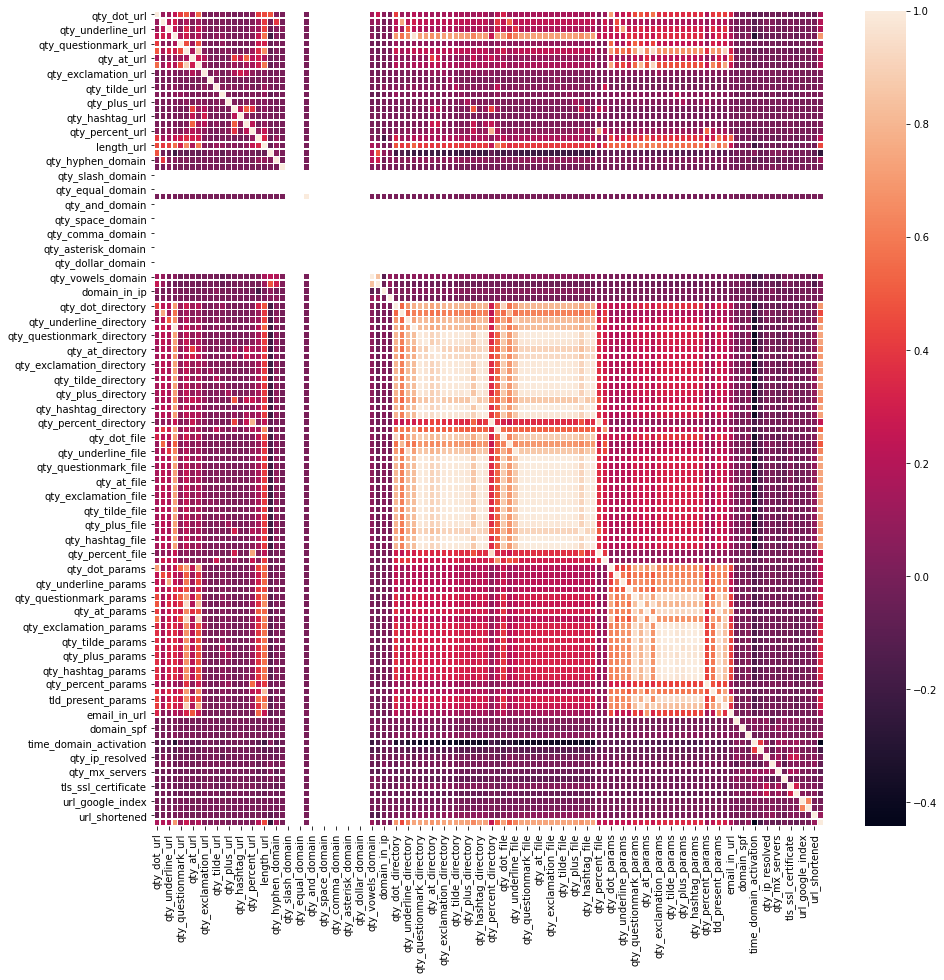

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

<h3> This correlation is printed below <h3/>

In [12]:
correlation= df.corr()
correlation

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109737,0.127851,0.246201,0.409549,0.498531,0.169224,0.550918,0.004187,-0.000405,...,-0.054120,-0.014089,-0.049845,0.012300,-0.065105,-0.051842,-0.004035,-0.002490,-0.059222,0.171128
qty_hyphen_url,0.109737,1.000000,0.213589,0.304762,0.061247,0.175158,0.041982,0.127984,0.018253,0.018090,...,0.029222,0.032991,-0.027048,-0.031027,0.009113,-0.001930,-0.002939,0.006875,-0.010346,0.200382
qty_underline_url,0.127851,0.213589,1.000000,0.246653,0.067009,0.334635,0.056885,0.256192,0.062300,-0.000767,...,0.004625,0.023962,-0.007595,-0.027089,0.012809,-0.013864,-0.001823,0.003421,-0.012158,0.191151
qty_slash_url,0.246201,0.304762,0.246653,1.000000,0.182759,0.287043,0.102281,0.202511,0.025946,0.015055,...,-0.046034,-0.032416,-0.045904,-0.021936,-0.018282,-0.047873,-0.005406,0.009470,-0.001125,0.699061
qty_questionmark_url,0.409549,0.061247,0.067009,0.182759,1.000000,0.461202,0.126747,0.467278,0.017859,0.004359,...,-0.025966,-0.003923,-0.032176,-0.006653,-0.040856,-0.024214,0.011679,0.010029,0.012847,0.111694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.051842,-0.001930,-0.013864,-0.047873,-0.024214,-0.043475,-0.017895,-0.030949,0.004488,-0.006923,...,0.274887,0.051420,0.133489,0.007329,0.306561,1.000000,0.038041,0.033091,0.049475,-0.061775
url_google_index,-0.004035,-0.002939,-0.001823,-0.005406,0.011679,-0.000349,-0.001903,-0.000335,-0.000811,-0.000336,...,0.043826,0.042233,0.022227,0.007591,0.026047,0.038041,1.000000,0.628815,-0.001785,-0.008986
domain_google_index,-0.002490,0.006875,0.003421,0.009470,0.010029,0.004701,-0.001889,0.001886,-0.001076,-0.000446,...,0.039959,0.040542,0.023628,0.008920,0.027592,0.033091,0.628815,1.000000,0.000045,0.000794
url_shortened,-0.059222,-0.010346,-0.012158,-0.001125,0.012847,-0.011855,-0.005330,-0.009989,-0.002503,-0.001038,...,0.059500,0.084482,0.013533,-0.031268,0.037850,0.049475,-0.001785,0.000045,1.000000,0.099250


In [13]:
print(correlation['qty_dot_url'])

qty_dot_url             1.000000
qty_hyphen_url          0.109737
qty_underline_url       0.127851
qty_slash_url           0.246201
qty_questionmark_url    0.409549
                          ...   
qty_redirects          -0.051842
url_google_index       -0.004035
domain_google_index    -0.002490
url_shortened          -0.059222
phishing                0.171128
Name: qty_dot_url, Length: 112, dtype: float64


<h3> Outliers: A data item/object that deviates greatly from the rest of the objects is referred to be an outlier. Errors in measurement or execution might cause them. In the give jupyter the The outliers are detected using the z score. In this methodology, the threshold is kept to 3. 
Using IQR, the outliers are removed, and a new dataset is generated <h3/>


In [14]:
#Finding Outliers using z-score:

from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.65444938 0.29376903 0.17313003 ... 0.03192479 0.07424717 1.3756882 ]
 [2.27305787 0.29376903 1.34717284 ... 0.03192479 0.07424717 1.3756882 ]
 [0.15485486 0.29376903 0.17313003 ... 0.03192479 0.07424717 0.7269089 ]
 ...
 [0.15485486 0.59966254 0.17313003 ... 0.03192479 0.07424717 1.3756882 ]
 [0.15485486 0.29376903 0.17313003 ... 0.03192479 0.07424717 1.3756882 ]
 [0.15485486 0.29376903 0.17313003 ... 0.03192479 0.07424717 0.7269089 ]]


In [15]:
threshold = 3
print(np.where(z > 3))

(array([    1,     1,     1, ..., 88642, 88643, 88644]), array([17, 18, 40, ..., 17, 36, 99]))


In [16]:
#IQR Score:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

qty_dot_url             0.0
qty_hyphen_url          0.0
qty_underline_url       0.0
qty_slash_url           2.0
qty_questionmark_url    0.0
                       ... 
qty_redirects           1.0
url_google_index        0.0
domain_google_index     0.0
url_shortened           0.0
phishing                1.0
Length: 112, dtype: float64


<h3> True means presence of an outlier: </h3>

In [29]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

       qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            False           False              False          False   
1            False           False              False          False   
2            False           False              False          False   
3            False           False              False          False   
4            False           False              False          False   
...            ...             ...                ...            ...   
88642        False           False              False          False   
88643        False           False              False          False   
88644        False           False              False          False   
88645        False           False              False          False   
88646        False           False              False          False   

       qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     False          False       False        Fa

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [18]:
#Removing outliers:

New_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
New_df.shape #new dataset without outliers

(13438, 112)

In [19]:
df.shape #old dataset with outliers

(88647, 112)

<h2> Modeling </h2>
<h3> The accuracy is retrieved using three different models. </h3>

In [20]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.model_selection import train_test_split

y = New_df['phishing']
x = New_df.drop(columns=['phishing'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

<h3> (1) Decision Tree Classifier </h3>

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(random_state =0)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy_score(y_test,y_predict)

0.9565476190476191

<h3> (2) Random Forest Classifier </h3>

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test , y_pred)

0.9747023809523809

<h3> (3) KNN Classifier </h3>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy_score(y_test , y_predict)

0.9729166666666667

<h4> Applying K-fold </h4>

In [26]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def binary_classification_accuracy(actual, pred):
    
    print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    print(f'Classification report: \n{classification_report(actual, pred)}')

In [28]:
folds = KFold(n_splits=4, shuffle=True, random_state=42)

train_index_list = list()
validation_index_list = list()

for fold, (train_idx, validation_idx) in enumerate(folds.split(x, y)):
    
    model = XGBClassifier()
    model.fit(np.array(x)[train_idx,:], np.array(y)[train_idx])
    predicted_values = model.predict(np.array(x)[validation_idx,:])
    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(y)[validation_idx], predicted_values)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
==== FOLD 1 ====
Confusion matrix: 
[[3077   24]
 [  46  213]]
Accuracy score: 
0.9791666666666666
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3101
           1       0.90      0.82      0.86       259

    accuracy                           0.98      3360
   macro avg       0.94      0.91      0.92      3360
weighted avg       0.98      0.98      0.98      3360

[18:35:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the defau

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


==== FOLD 2 ====
Confusion matrix: 
[[3103   19]
 [  45  193]]
Accuracy score: 
0.9809523809523809
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3122
           1       0.91      0.81      0.86       238

    accuracy                           0.98      3360
   macro avg       0.95      0.90      0.92      3360
weighted avg       0.98      0.98      0.98      3360

[18:35:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


==== FOLD 3 ====
Confusion matrix: 
[[3095   24]
 [  48  192]]
Accuracy score: 
0.9785650491217625
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3119
           1       0.89      0.80      0.84       240

    accuracy                           0.98      3359
   macro avg       0.94      0.90      0.92      3359
weighted avg       0.98      0.98      0.98      3359

[18:35:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


==== FOLD 4 ====
Confusion matrix: 
[[3094   26]
 [  41  198]]
Accuracy score: 
0.9800535873771956
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3120
           1       0.88      0.83      0.86       239

    accuracy                           0.98      3359
   macro avg       0.94      0.91      0.92      3359
weighted avg       0.98      0.98      0.98      3359

